## Precios de Combustibles 

In [1]:
import warnings
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [2]:
df=pd.read_csv('Precios_Combustible.csv')

In [3]:
df.shape

(35978, 19)

In [4]:
df.head()

,indice_tiempo,idempresa,cuit,empresa,direccion,localidad,provincia,region,idproducto,producto,idtipohorario,tipohorario,precio,fecha_vigencia,idempresabandera,empresabandera,latitud,longitud,geojson
0,2017-03,1376,33-64337382-9,10 DE SETIEMBRE S.A.,Av. Mosconi 299,LOMAS DEL MIRADOR,BUENOS AIRES,PAMPEANA,6,GNC,2,Diurno,8.79,2017-03-27 10:38:00,1,BLANCA,-34.658476,-58.529443,"{""type"":""Point"",""coordinates"":[-58.529443,-34...."
1,2017-03,1376,33-64337382-9,10 DE SETIEMBRE S.A.,Av. Mosconi 299,LOMAS DEL MIRADOR,BUENOS AIRES,PAMPEANA,6,GNC,3,Nocturno,8.79,2017-03-27 10:38:00,1,BLANCA,-34.658476,-58.529443,"{""type"":""Point"",""coordinates"":[-58.529443,-34...."
2,2017-04,8943,30-71251168-7,1913 SRL,Julio A Roca 715,GOBERNADOR COSTA,CHUBUT,PATAGONIA,19,Gas Oil Grado 2,2,Diurno,14.96,2017-04-06 20:51:00,26,AXION,-44.050662,-70.583041,"{""type"":""Point"",""coordinates"":[-70.583041,-44...."
3,2017-04,8943,30-71251168-7,1913 SRL,Julio A Roca 715,GOBERNADOR COSTA,CHUBUT,PATAGONIA,19,Gas Oil Grado 2,3,Nocturno,14.96,2017-04-06 20:51:00,26,AXION,-44.050662,-70.583041,"{""type"":""Point"",""coordinates"":[-70.583041,-44...."
4,2017-04,8943,30-71251168-7,1913 SRL,Julio A Roca 715,GOBERNADOR COSTA,CHUBUT,PATAGONIA,21,Gas Oil Grado 3,2,Diurno,16.75,2017-04-06 20:52:00,26,AXION,-44.050662,-70.583041,"{""type"":""Point"",""coordinates"":[-70.583041,-44...."


In [5]:
df.value_counts().index

MultiIndex([('2020-07', 8952, '33-71518900-9',               'ADD SRL', ...),
            ('2019-12', 3570, '30-51618667-0', 'DEHEZA S.A.I.C.I.F.I.', ...),
            ('2019-12', 3559, '30-51618667-0',    'DEHEZA S.A.I.C.F.I', ...),
            ('2019-12', 3559, '30-51618667-0',    'DEHEZA S.A.I.C.F.I', ...),
            ('2019-12', 3559, '30-51618667-0',    'DEHEZA S.A.I.C.F.I', ...),
            ('2019-12', 3559, '30-51618667-0',    'DEHEZA S.A.I.C.F.I', ...),
            ('2019-12', 3568, '30-51618667-0',   'DEHEZA S.A.I.C.F.I.', ...),
            ('2019-12', 3568, '30-51618667-0',   'DEHEZA S.A.I.C.F.I.', ...),
            ('2019-12', 3568, '30-51618667-0',   'DEHEZA S.A.I.C.F.I.', ...),
            ('2019-12', 3568, '30-51618667-0',   'DEHEZA S.A.I.C.F.I.', ...),
            ...
            ('2020-03',  842, '30-67877449-5',    'OPESSA ACA GALARZA', ...),
            ('2020-03',  842, '30-67877449-5',    'OPESSA ACA GALARZA', ...),
            ('2020-03',  842, '30-67877449-5',  

In [6]:
df.isnull().sum()

indice_tiempo          0
idempresa              0
cuit                   0
empresa                0
direccion             14
localidad              0
provincia              0
region              3383
idproducto             0
producto               0
idtipohorario          0
tipohorario            0
precio                 0
fecha_vigencia         0
idempresabandera       0
empresabandera         0
latitud               98
longitud              98
geojson               98
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35978 entries, 0 to 35977
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   indice_tiempo     35978 non-null  object 
 1   idempresa         35978 non-null  int64  
 2   cuit              35978 non-null  object 
 3   empresa           35978 non-null  object 
 4   direccion         35964 non-null  object 
 5   localidad         35978 non-null  object 
 6   provincia         35978 non-null  object 
 7   region            32595 non-null  object 
 8   idproducto        35978 non-null  int64  
 9   producto          35978 non-null  object 
 10  idtipohorario     35978 non-null  int64  
 11  tipohorario       35978 non-null  object 
 12  precio            35978 non-null  float64
 13  fecha_vigencia    35978 non-null  object 
 14  idempresabandera  35978 non-null  int64  
 15  empresabandera    35978 non-null  object 
 16  latitud           35880 non-null  float6

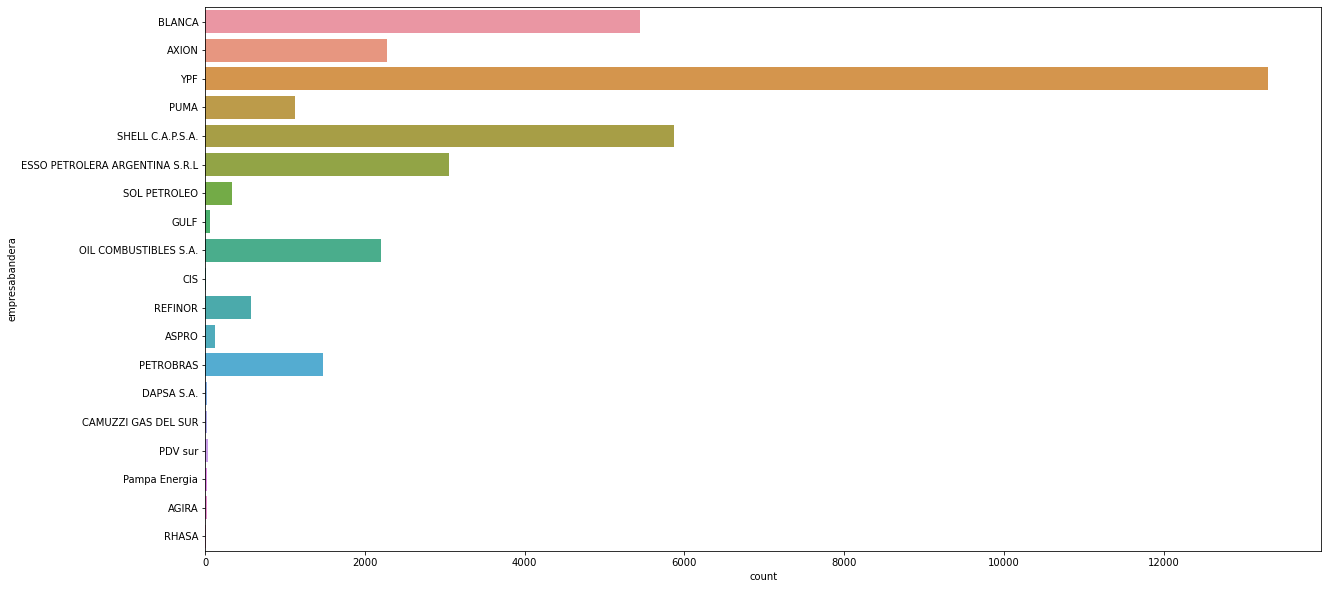

In [9]:
plt.figure(figsize=(20,10))
sns.countplot(y=df['empresabandera'])
plt.show()

In [10]:
df_t=df[df.provincia.isin(['TUCUMAN','SANTIAGO DEL ESTERO','CATAMARCA','SALTA','JUJUY','CORDOBA'])]

In [11]:
df_t.shape

(7206, 19)

In [12]:
df_bs=df[df.provincia.isin(['BUENOS AIRES'])] 
df_bs.shape

(13438, 19)

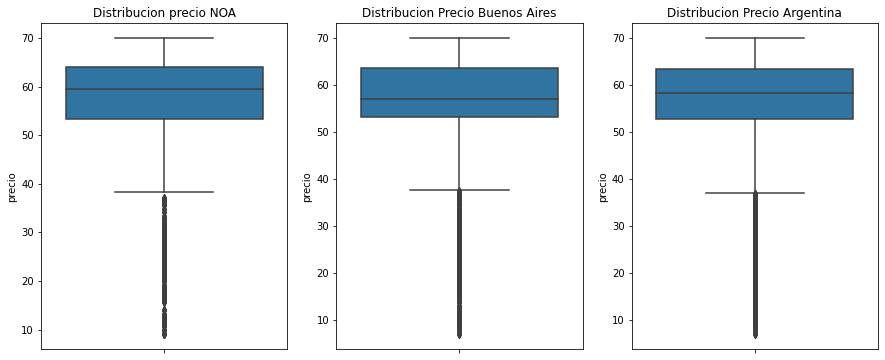

In [13]:
plt.figure(figsize=(15,6))
plt.subplot(1,3,1)
sns.boxplot(y=df_t['precio']) 
plt.title('Distribucion precio NOA') 
plt.subplot(1,3,2)
sns.boxplot(y=df_bs['precio']) 
plt.title('Distribucion Precio Buenos Aires') 
plt.subplot(1,3,3)
sns.boxplot(y=df['precio'])
plt.title('Distribucion Precio Argentina')
plt.show()

In [14]:
def elimino_valores_atipicos(df_6):
    Q1=df.quantile(0.25)
    Q3=df.quantile(0.75)
    IQR=Q3-Q1

    df_filtrado= df[~((df_6 < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]

    return df_filtrado

In [15]:
df=elimino_valores_atipicos(df)

In [16]:
df_t['precio'].mean()

53.921345545378855

In [17]:
df_t.describe()

,idempresa,idproducto,idtipohorario,precio,idempresabandera,latitud,longitud
count,7206.00000,7206.000000,7206.000000,7206.000000,7206.000000,7170.000000,7170.000000
mean,5068.03053,10.544546,2.500000,53.921346,5.788232,-29.698052,-64.296425
std,2964.61060,8.379738,0.500035,14.951625,7.800593,3.057381,0.980289
min,105.00000,2.000000,2.000000,8.990000,1.000000,-34.903929,-68.760231
25%,2488.25000,3.000000,2.000000,53.390000,2.000000,-31.720810,-65.156670
50%,4998.00000,6.000000,2.500000,59.490000,2.000000,-31.347220,-64.263279
75%,7727.00000,19.000000,3.000000,63.990000,4.000000,-27.038890,-64.020377
max,9869.00000,21.000000,3.000000,69.990000,29.000000,-22.055820,-58.391527


In [18]:
df_bs.describe()

,idempresa,idproducto,idtipohorario,precio,idempresabandera,latitud,longitud
count,13438.000000,13438.000000,13438.000000,13438.000000,13438.000000,13430.000000,13430.000000
mean,4821.558863,10.600238,2.499851,53.630095,8.061542,-35.348312,-59.105056
std,2894.213051,8.411119,0.500019,14.033017,9.613287,1.384129,1.350285
min,102.000000,2.000000,2.000000,7.000000,1.000000,-40.800308,-66.847852
25%,2085.000000,3.000000,2.000000,53.190000,2.000000,-35.627690,-59.500150
50%,4741.000000,6.000000,2.000000,56.930000,3.000000,-34.740776,-58.608905
75%,7391.000000,19.000000,3.000000,63.540000,17.000000,-34.563043,-58.389508
max,9868.000000,21.000000,3.000000,69.990000,29.000000,-29.413973,-56.679214


In [19]:
df.describe()

,idempresa,idproducto,idtipohorario,precio,idempresabandera,latitud,longitud
count,22154.000000,22154.000000,22154.000000,22154.000000,22154.000000,22060.000000,22060.000000
mean,4530.430080,11.200822,2.499910,59.263930,2.478740,-33.238278,-61.324527
std,2926.589971,8.782848,0.500011,5.661502,1.112392,2.877142,3.428409
min,104.000000,2.000000,2.000000,36.990000,1.000000,-39.514240,-71.049582
25%,1680.000000,2.000000,2.000000,54.590000,2.000000,-34.732736,-64.128660
50%,4159.000000,3.000000,2.000000,59.490000,2.000000,-33.736548,-60.567160
75%,7307.000000,19.000000,3.000000,64.200000,3.000000,-31.534890,-58.536520
max,9869.000000,21.000000,3.000000,69.990000,7.000000,-26.476965,-54.112920


In [20]:
df.provincia.unique()

array(['SAN LUIS', 'BUENOS AIRES', 'SANTA FE', 'ENTRE RIOS', 'RIO NEGRO',
       'CHACO', 'SANTIAGO DEL ESTERO', 'MENDOZA', 'CATAMARCA', 'CORDOBA',
       'MISIONES', 'CORRIENTES', 'LA PAMPA', 'CAPITAL FEDERAL', 'TUCUMAN',
       'NEUQUEN', 'SAN JUAN', 'LA RIOJA', 'JUJUY', 'FORMOSA'],
      dtype=object)

### Damos formato de tiempo a la columna "Fecha_Vigencia"

In [21]:
df.fecha_vigencia=pd.to_datetime(df.fecha_vigencia)
df

,indice_tiempo,idempresa,cuit,empresa,direccion,localidad,provincia,region,idproducto,producto,idtipohorario,tipohorario,precio,fecha_vigencia,idempresabandera,empresabandera,latitud,longitud,geojson
10,2019-12,1284,30-56342987-5,25 DE MAYO SRL (EESS),25 DE MAYO 675,VILLA MERCEDES,SAN LUIS,CUYO,19,Gas Oil Grado 2,2,Diurno,54.39,2019-12-01 00:00:00,2,YPF,-33.67954,-65.46988,"{""type"":""Point"",""coordinates"":[-65.46988,-33.6..."
11,2019-12,1284,30-56342987-5,25 DE MAYO SRL (EESS),25 DE MAYO 675,VILLA MERCEDES,SAN LUIS,CUYO,19,Gas Oil Grado 2,3,Nocturno,54.39,2019-12-01 00:00:00,2,YPF,-33.67954,-65.46988,"{""type"":""Point"",""coordinates"":[-65.46988,-33.6..."
12,2019-12,1284,30-56342987-5,25 DE MAYO SRL (EESS),25 DE MAYO 675,VILLA MERCEDES,SAN LUIS,CUYO,21,Gas Oil Grado 3,2,Diurno,65.24,2019-12-01 00:00:00,2,YPF,-33.67954,-65.46988,"{""type"":""Point"",""coordinates"":[-65.46988,-33.6..."
13,2019-12,1284,30-56342987-5,25 DE MAYO SRL (EESS),25 DE MAYO 675,VILLA MERCEDES,SAN LUIS,CUYO,21,Gas Oil Grado 3,3,Nocturno,65.24,2019-12-01 00:00:00,2,YPF,-33.67954,-65.46988,"{""type"":""Point"",""coordinates"":[-65.46988,-33.6..."
16,2020-03,1284,30-56342987-5,25 DE MAYO SRL (EESS),25 DE MAYO 675,VILLA MERCEDES,SAN LUIS,CUYO,3,Nafta (premium) de más de 95 Ron,2,Diurno,67.26,2020-03-02 00:00:00,2,YPF,-33.67954,-65.46988,"{""type"":""Point"",""coordinates"":[-65.46988,-33.6..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35973,2020-03,7895,30-71221281-7,LIQUID GAS S.A,NaN,MORON,BUENOS AIRES,PAMPEANA,3,Nafta (premium) de más de 95 Ron,3,Nocturno,63.25,2020-03-02 00:00:00,2,YPF,-34.66054,-58.60785,"{""type"":""Point"",""coordinates"":[-58.60785,-34.6..."
35974,2020-03,7895,30-71221281-7,LIQUID GAS S.A,NaN,MORON,BUENOS AIRES,PAMPEANA,2,Nafta (súper) entre 92 y 95 Ron,2,Diurno,54.48,2020-03-02 00:00:00,2,YPF,-34.66054,-58.60785,"{""type"":""Point"",""coordinates"":[-58.60785,-34.6..."
35975,2020-03,7895,30-71221281-7,LIQUID GAS S.A,NaN,MORON,BUENOS AIRES,PAMPEANA,2,Nafta (súper) entre 92 y 95 Ron,3,Nocturno,54.48,2020-03-02 00:00:00,2,YPF,-34.66054,-58.60785,"{""type"":""Point"",""coordinates"":[-58.60785,-34.6..."
35976,2020-04,2243,30-53852511-8,ALFREDO BRUGNOLI E HIJOS S.C.C,NaN,CONCEPCION DEL BERMEJO,CHACO,NEA,2,Nafta (súper) entre 92 y 95 Ron,2,Diurno,61.20,2020-04-30 10:01:00,1,BLANCA,-26.60249,-60.95301,"{""type"":""Point"",""coordinates"":[-60.95301,-26.6..."


In [22]:
## Se reordena el dataset por fecha
df.sort_values('fecha_vigencia',inplace=True) 
df.reset_index(drop=True, inplace= True) 
df

,indice_tiempo,idempresa,cuit,empresa,direccion,localidad,provincia,region,idproducto,producto,idtipohorario,tipohorario,precio,fecha_vigencia,idempresabandera,empresabandera,latitud,longitud,geojson
0,2018-07,1459,30-57345541-6,ORAZI HNOS.,AVDA. DE MAYO 990,AREQUITO,SANTA FE,CENTRO,3,Nafta (premium) de más de 95 Ron,2,Diurno,38.99,2018-07-10 11:39:00,4,SHELL C.A.P.S.A.,-33.141390,-61.465880,"{""type"":""Point"",""coordinates"":[-61.46588,-33.1..."
1,2018-07,1459,30-57345541-6,ORAZI HNOS.,AVDA. DE MAYO 990,AREQUITO,SANTA FE,CENTRO,2,Nafta (súper) entre 92 y 95 Ron,3,Nocturno,36.99,2018-07-10 11:39:00,4,SHELL C.A.P.S.A.,-33.141390,-61.465880,"{""type"":""Point"",""coordinates"":[-61.46588,-33.1..."
2,2018-07,1459,30-57345541-6,ORAZI HNOS.,AVDA. DE MAYO 990,AREQUITO,SANTA FE,CENTRO,2,Nafta (súper) entre 92 y 95 Ron,2,Diurno,36.99,2018-07-10 11:39:00,4,SHELL C.A.P.S.A.,-33.141390,-61.465880,"{""type"":""Point"",""coordinates"":[-61.46588,-33.1..."
3,2018-07,1459,30-57345541-6,ORAZI HNOS.,AVDA. DE MAYO 990,AREQUITO,SANTA FE,CENTRO,3,Nafta (premium) de más de 95 Ron,3,Nocturno,38.99,2018-07-10 11:39:00,4,SHELL C.A.P.S.A.,-33.141390,-61.465880,"{""type"":""Point"",""coordinates"":[-61.46588,-33.1..."
4,2018-07,2658,30-67162857-4,MORAN MANERA Y OTROS,UGARTE Y GARAY,CHARLONE,BUENOS AIRES,PAMPEANA,3,Nafta (premium) de más de 95 Ron,2,Diurno,39.17,2018-07-28 19:06:00,1,BLANCA,-34.672560,-63.369870,"{""type"":""Point"",""coordinates"":[-63.36987,-34.6..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22149,2020-07,2447,30-68817343-0,PEUMAN S.R.L,RUTA NAC 205 Y AV PEREYRA,SALADILLO,BUENOS AIRES,PAMPEANA,2,Nafta (súper) entre 92 y 95 Ron,3,Nocturno,59.98,2020-07-18 14:03:00,4,SHELL C.A.P.S.A.,-35.629240,-59.781532,"{""type"":""Point"",""coordinates"":[-59.781532,-35...."
22150,2020-07,7786,30-71205709-9,VIPETROL S.A.,Ruta Nacional 205 Km 182.5,SALADILLO,BUENOS AIRES,PAMPEANA,2,Nafta (súper) entre 92 y 95 Ron,3,Nocturno,59.98,2020-07-18 14:04:00,4,SHELL C.A.P.S.A.,-35.629154,-59.782673,"{""type"":""Point"",""coordinates"":[-59.782673,-35...."
22151,2020-07,7786,30-71205709-9,VIPETROL S.A.,Ruta Nacional 205 Km 182.5,SALADILLO,BUENOS AIRES,PAMPEANA,2,Nafta (súper) entre 92 y 95 Ron,2,Diurno,59.98,2020-07-18 14:04:00,4,SHELL C.A.P.S.A.,-35.629154,-59.782673,"{""type"":""Point"",""coordinates"":[-59.782673,-35...."
22152,2020-07,7456,30-66605870-0,VICENTE VARACALLI E HIJOS S.A.,AV SAN MARTIN (RUTA 2) Y SAENZ PEÑA,LEZAMA,BUENOS AIRES,PAMPEANA,2,Nafta (súper) entre 92 y 95 Ron,2,Diurno,59.09,2020-07-18 22:00:00,1,BLANCA,-35.872110,-57.897140,"{""type"":""Point"",""coordinates"":[-57.89714,-35.8..."


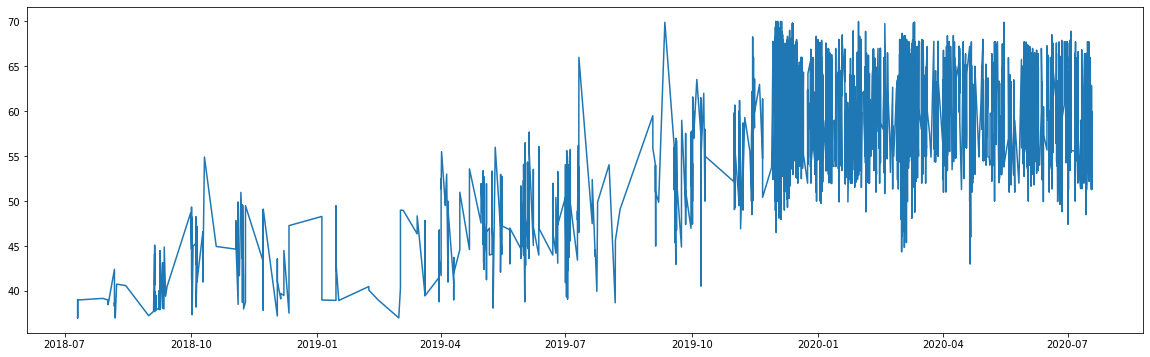

In [23]:
plt.figure(figsize=(20,6)) 
plt.plot(df.fecha_vigencia, df.precio)
plt.show()

In [24]:
#Observamos la fechas faltantes
df['date_check'] = df.fecha_vigencia.diff()
df.date_check.value_counts()

0 days 00:00:00    18970
0 days 00:01:00     1170
0 days 00:02:00      301
0 days 00:03:00      153
0 days 00:04:00      103
                   ...  
2 days 00:00:00        1
3 days 20:01:00        1
0 days 04:11:00        1
0 days 14:09:00        1
2 days 05:43:00        1
Name: date_check, Length: 591, dtype: int64

In [25]:
#Rellenamos la fechas faltantes
df = df.set_index("fecha_vigencia").resample("d").mean().reset_index()

In [26]:
df

,fecha_vigencia,idempresa,idproducto,idtipohorario,precio,idempresabandera,latitud,longitud
0,2018-07-10,1459.000000,2.500000,2.500000,37.990000,4.000000,-33.141390,-61.465880
1,2018-07-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2018-07-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2018-07-13,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2018-07-14,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
735,2020-07-14,7250.666667,8.083333,2.500000,57.504167,2.916667,-34.391965,-60.204331
736,2020-07-15,3511.571429,10.000000,2.500000,60.618571,1.857143,-32.240223,-62.413441
737,2020-07-16,6628.224490,9.020408,2.510204,60.725510,2.285714,-33.249377,-60.717099
738,2020-07-17,7305.000000,12.000000,2.500000,65.145000,1.000000,-31.321339,-58.725318


In [27]:
df.rename(columns={'fecha_vigencia':'fecha'}, inplace=True)
df=df[['fecha','precio']]
df

,fecha,precio
0,2018-07-10,37.990000
1,2018-07-11,NaN
2,2018-07-12,NaN
3,2018-07-13,NaN
4,2018-07-14,NaN
...,...,...
735,2020-07-14,57.504167
736,2020-07-15,60.618571
737,2020-07-16,60.725510
738,2020-07-17,65.145000


In [28]:
print(df.isna().sum())
df = df.interpolate()
print(df.isna().sum())

fecha       0
precio    426
dtype: int64
fecha     0
precio    0
dtype: int64


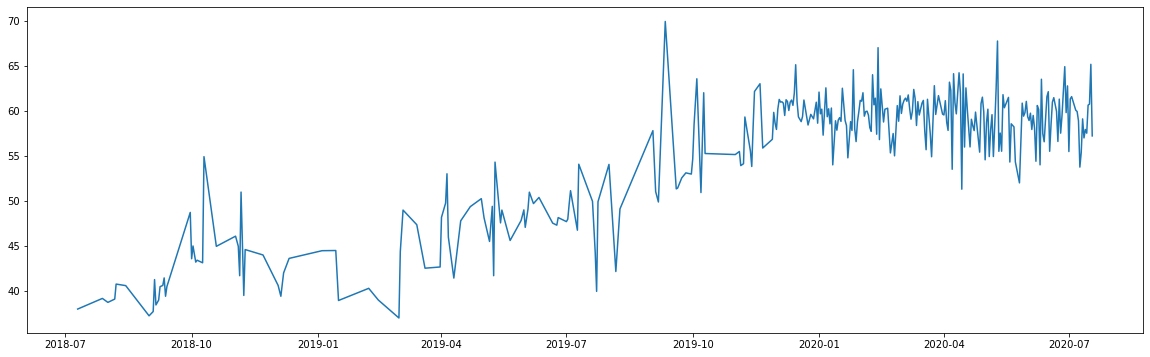

In [29]:
plt.figure(figsize=(20,6))
plt.plot(df.fecha, df.precio)
plt.show()

In [30]:
promedio_diario=df.precio.rolling(window=7, center=True).mean()
promedio_diario

0            NaN
1            NaN
2            NaN
3      38.186667
4      38.252222
         ...    
735    59.711000
736    59.441357
737          NaN
738          NaN
739          NaN
Name: precio, Length: 740, dtype: float64

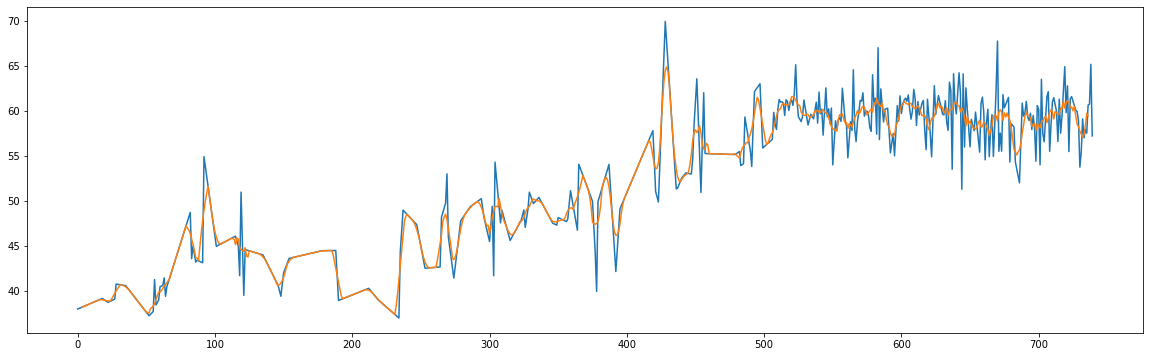

In [31]:
plt.figure(figsize=(20,6))
plt.plot(df.index, df.precio)
plt.plot(promedio_diario)
plt.show()

In [32]:
mensual=df.resample('M', on='fecha').mean() 
mensual.shape

(25, 1)

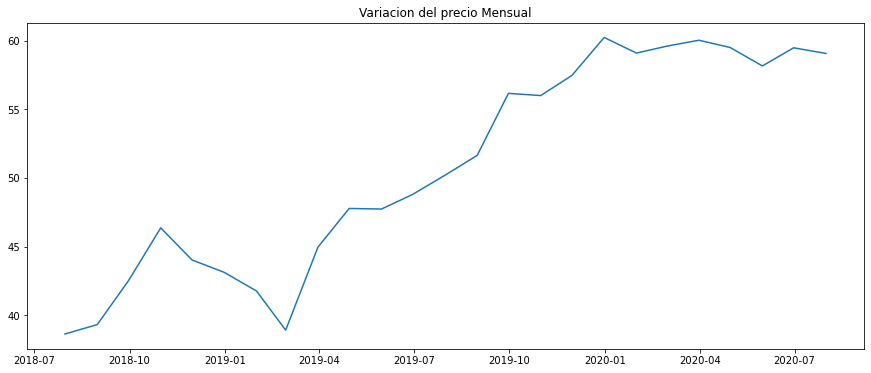

In [33]:
plt.figure(figsize=(15,6))
plt.plot(mensual) 
plt.title('Variacion del precio Mensual') 
plt.show()

In [34]:
promedio_mensual=mensual.precio.rolling(window=7, center=True).mean()
promedio_mensual

fecha
2018-07-31          NaN
2018-08-31          NaN
2018-09-30          NaN
2018-10-31    42.244690
2018-11-30    42.284734
2018-12-31    43.090202
2019-01-31    43.841409
2019-02-28    44.036948
2019-03-31    44.718896
2019-04-30    45.729200
2019-05-31    47.140050
2019-06-30    49.603287
2019-07-31    51.180193
2019-08-31    52.564121
2019-09-30    54.349203
2019-10-31    55.819139
2019-11-30    57.161788
2019-12-31    58.359876
2020-01-31    58.836827
2020-02-29    59.145134
2020-03-31    59.432448
2020-04-30    59.266314
2020-05-31          NaN
2020-06-30          NaN
2020-07-31          NaN
Freq: M, Name: precio, dtype: float64

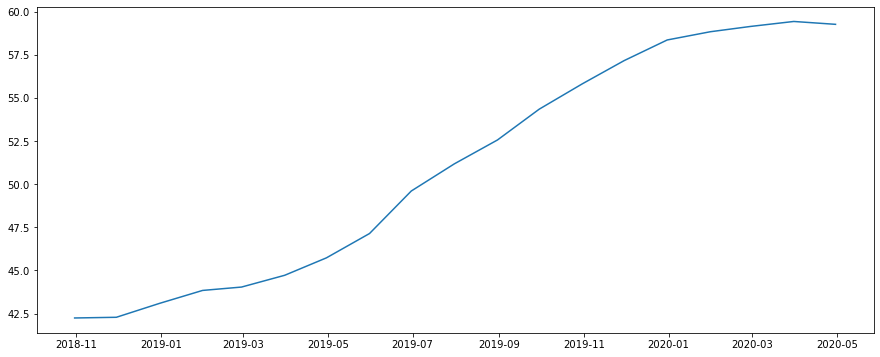

In [35]:
plt.figure(figsize=(15,6))
plt.plot(promedio_mensual)
plt.show()

## Prueba de prediccion 

In [36]:
diario=df.resample('d', on='fecha').mean() 
diario

,precio
fecha,
2018-07-10,37.990000
2018-07-11,38.055556
2018-07-12,38.121111
2018-07-13,38.186667
2018-07-14,38.252222
...,...
2020-07-14,57.504167
2020-07-15,60.618571
2020-07-16,60.725510


In [37]:
diario=diario.precio
diario.head()

fecha
2018-07-10    37.990000
2018-07-11    38.055556
2018-07-12    38.121111
2018-07-13    38.186667
2018-07-14    38.252222
Freq: D, Name: precio, dtype: float64

In [38]:
look_back=90*1 #uso 90 dias para predecir el valor siguiente

In [39]:
N=diario.shape[0]
X=np.zeros((N- look_back - 1, look_back))
y=np.zeros(N- look_back-1)
print(X.shape, y.shape)

(649, 90) (649,)


In [40]:
# LLenamos las funcion x e y

for i in range (X.shape[0]): 
    X[i,:]= diario.iloc[i:i+look_back]
    y[i]=diario.iloc[i+look_back]

In [41]:
N_train= 365*1- look_back
N_test=400

length_total= N_train + N_test + look_back 

X_train = X[:N_train,:]
y_train= y[:N_train]
print(X_train.shape, y_train.shape)

X_test= X[N_train:N_train+N_test,:]
y_test= y[N_train:N_train+N_test]
print(X_test.shape, y_test.shape)


(275, 90) (275,)
(374, 90) (374,)


In [42]:
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs = 4).fit(X_train,y_train)

In [43]:
y_pred = rf.predict(X)
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)

In [44]:
mean_squared_error(y_test, y_test_pred, squared=False)

8.836354232551358

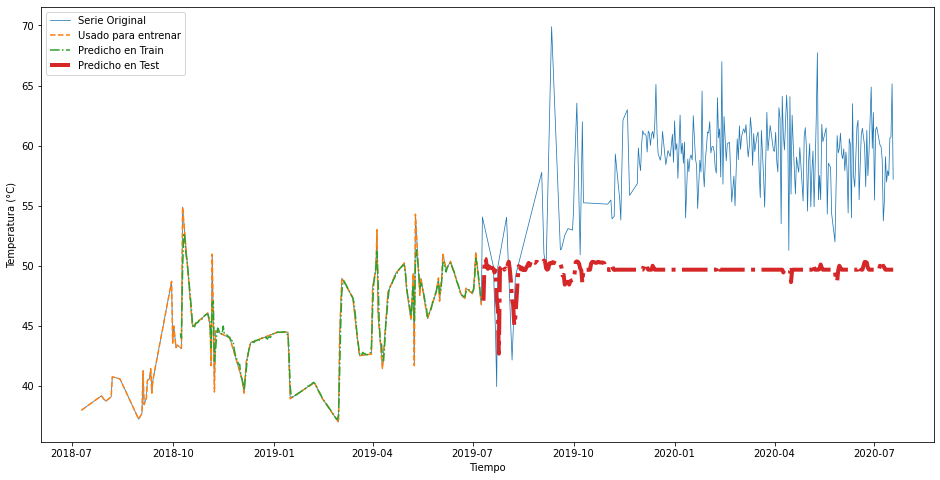

In [45]:
plt.figure(figsize=(16,8))
plt.plot(diario.index[:length_total], diario[:length_total],lw = 0.75, label = 'Serie Original')
plt.plot(diario.index[:N_train + look_back], diario[:N_train + look_back],'--', label = 'Usado para entrenar')
plt.plot(diario.index[look_back: look_back + N_train], y_train_pred,'-.',label = 'Predicho en Train')
plt.plot(diario.index[N_train+look_back+1: length_total], y_test_pred,'-.', lw = 4, label = 'Predicho en Test')
plt.legend()
plt.xlabel('Tiempo')
plt.ylabel('Temperatura (°C)')
plt.show()

Error del train: 0.715599139617703
Error del test: 8.836354232551358


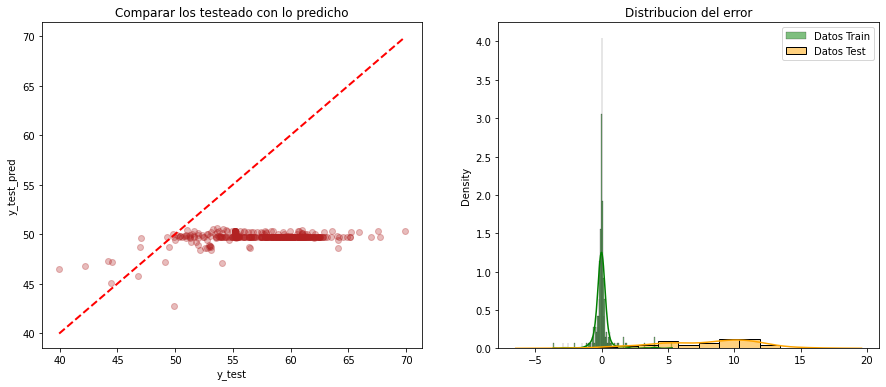

In [46]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
plt.scatter(y_test,y_test_pred,alpha=0.3,color='firebrick')

plt.plot([y_test.min(), y_test.max()],
         [y_test.min(),y_test.max()], 
         'r--',linewidth=2)


plt.title('Comparar los testeado con lo predicho')
plt.xlabel('y_test')
plt.ylabel('y_test_pred') 


plt.subplot(1,2,2)
sns.histplot(y_train-y_train_pred, kde=True,label='Datos Train',stat='density',color='green')
sns.histplot(y_test-y_test_pred, kde=True,label='Datos Test',stat='density',color='orange')
plt.title('Distribucion del error')
plt.legend()

MSE=mean_squared_error(y_train,y_train_pred,squared=False)
MSE_test=mean_squared_error(y_test, y_test_pred, squared=False)
print('Error del train:',MSE)
print('Error del test:',MSE_test)

plt.show()

## Redes Neuronales ## 

In [47]:
from sklearn.neural_network import MLPRegressor 
rn_regre= MLPRegressor(max_iter=800, learning_rate='adaptive')
rn_regre.fit(X_train, y_train) 

MLPRegressor(learning_rate='adaptive', max_iter=800)

In [48]:
y_pred=rn_regre.predict(X)
y_train_pred=rn_regre.predict(X_train) 
y_test_pred=rn_regre.predict(X_test)

In [49]:
rmse_test= mean_squared_error(y_test, y_test_pred, squared= False)
rmse_train= mean_squared_error(y_train, y_train_pred, squared=False) 
print(rmse_train)
print(rmse_test)

2.2223426513896025
3.394488550808081


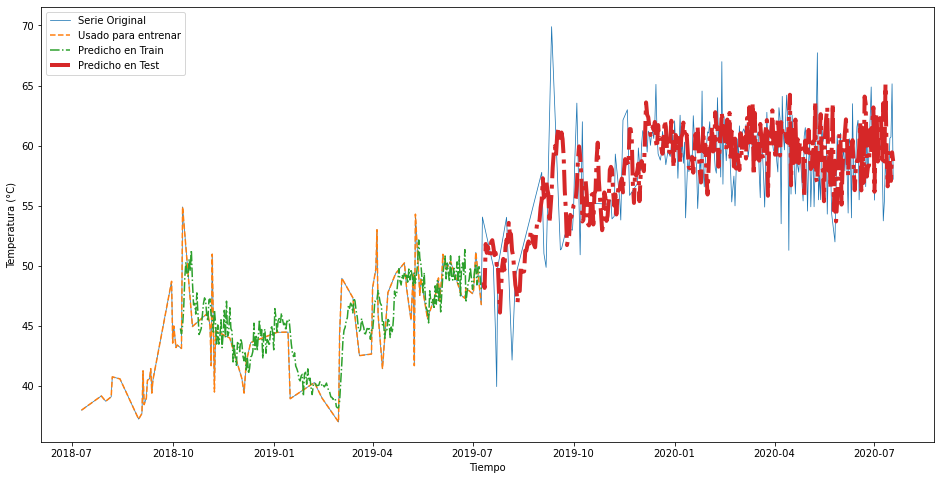

In [50]:
plt.figure(figsize=(16,8))
plt.plot(diario.index[:length_total], diario[:length_total],lw = 0.75, label = 'Serie Original')
plt.plot(diario.index[:N_train + look_back], diario[:N_train + look_back],'--', label = 'Usado para entrenar')
plt.plot(diario.index[look_back: look_back + N_train], y_train_pred,'-.',label = 'Predicho en Train')
plt.plot(diario.index[N_train+look_back+1: length_total], y_test_pred,'-.', lw = 4, label = 'Predicho en Test')
plt.legend()
plt.xlabel('Tiempo')
plt.ylabel('Temperatura (°C)')
plt.show()

Error del train: 2.2223426513896025
Error del test: 3.394488550808081


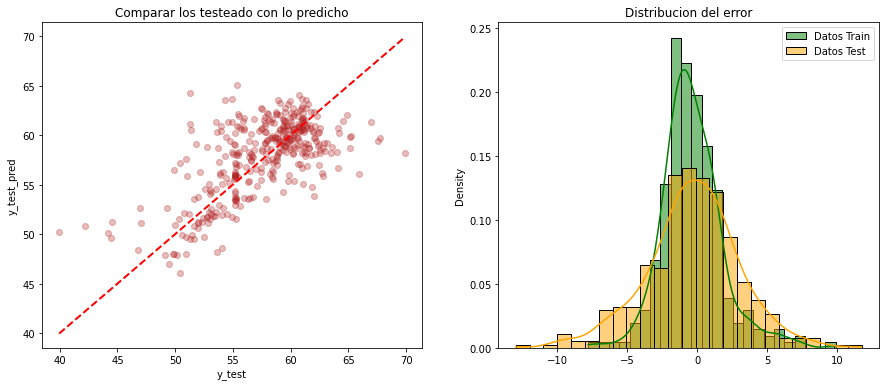

In [51]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
plt.scatter(y_test,y_test_pred,alpha=0.3,color='firebrick')

plt.plot([y_test.min(), y_test.max()],
         [y_test.min(),y_test.max()], 
         'r--',linewidth=2)


plt.title('Comparar los testeado con lo predicho')
plt.xlabel('y_test')
plt.ylabel('y_test_pred') 


plt.subplot(1,2,2)
sns.histplot(y_train-y_train_pred, kde=True,label='Datos Train',stat='density',color='green')
sns.histplot(y_test-y_test_pred, kde=True,label='Datos Test',stat='density',color='orange')
plt.title('Distribucion del error')
plt.legend()

MSE=mean_squared_error(y_train,y_train_pred,squared=False)
MSE_test=mean_squared_error(y_test, y_test_pred, squared=False)
print('Error del train:',MSE)
print('Error del test:',MSE_test)

plt.show()

## Prediccion para el año 2021 ##

In [52]:
diario=df.resample('d', on='fecha').mean() 
diario

,precio
fecha,
2018-07-10,37.990000
2018-07-11,38.055556
2018-07-12,38.121111
2018-07-13,38.186667
2018-07-14,38.252222
...,...
2020-07-14,57.504167
2020-07-15,60.618571
2020-07-16,60.725510


In [53]:
diario=diario['2020-01':'2020-12'] 
diario

,precio
fecha,
2020-01-01,62.063333
2020-01-02,59.652222
2020-01-03,60.172381
2020-01-04,57.285538
2020-01-05,59.909644
...,...
2020-07-14,57.504167
2020-07-15,60.618571
2020-07-16,60.725510


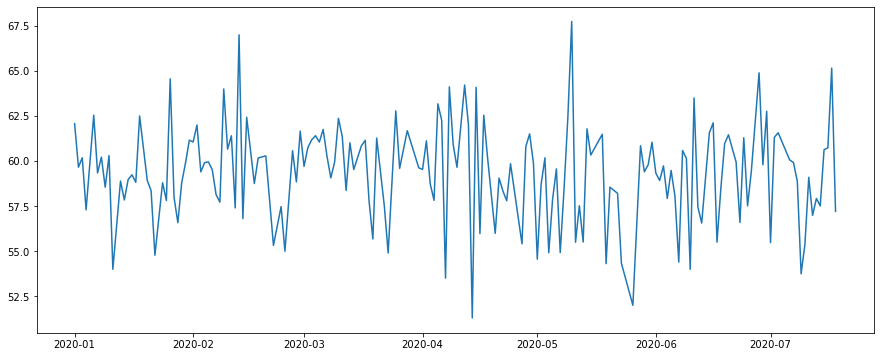

In [54]:
plt.figure(figsize=(15,6))
plt.plot(diario) 
plt.show()

In [55]:
from statsmodels.tsa.stattools import adfuller 
X = diario.precio 
result = adfuller(X)
print('ADF Statistic: %f' % result[0]) 
print('p-value: %f' % result[1]) 
print('Critical Values:') 
for key, value in result[4].items(): print('\t%s: %.3f' % (key, value))

ADF Statistic: -12.735653
p-value: 0.000000
Critical Values:
	1%: -3.464
	5%: -2.876
	10%: -2.575
